In [1]:
import pandas as pd
import json

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

# Carregando com pandas
df = pd.read_json(url)

In [3]:
pd.read_json(url)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [4]:
dados = pd.read_json(url)
type(dados)

pandas.core.frame.DataFrame

In [5]:
dados.shape

(7267, 6)

In [6]:
dados.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [8]:
# entendendo o que tem dentro de cada coluna
chaves = dados['account'].dropna().apply(lambda x: list(x.keys()) if isinstance(x, dict) else []).explode().unique()
print("Chaves únicas na coluna 'account':")
print(chaves)

chaves = dados['internet'].dropna().apply(lambda x: list(x.keys()) if isinstance(x, dict) else []).explode().unique()
print("Chaves únicas na coluna 'internet':")
print(chaves)

chaves = dados['phone'].dropna().apply(lambda x: list(x.keys()) if isinstance(x, dict) else []).explode().unique()
print("Chaves únicas na coluna 'phone':")
print(chaves)

chaves = dados['customer'].dropna().apply(lambda x: list(x.keys()) if isinstance(x, dict) else []).explode().unique()
print("Chaves únicas na coluna 'customer':")
print(chaves)

Chaves únicas na coluna 'account':
['Contract' 'PaperlessBilling' 'PaymentMethod' 'Charges']
Chaves únicas na coluna 'internet':
['InternetService' 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection'
 'TechSupport' 'StreamingTV' 'StreamingMovies']
Chaves únicas na coluna 'phone':
['PhoneService' 'MultipleLines']
Chaves únicas na coluna 'customer':
['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure']


In [9]:
#verificando se tem dados nulos
print(df.isnull().sum())

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [10]:
#verificando colunas com valore inconsistentes
for col in df.select_dtypes(include='object').columns:
    print(f"\n📌 Coluna: {col}")
    try:
        print(df[col].unique())
    except:
        print("⚠️ Contém dados complexos como dicionários")



📌 Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

📌 Coluna: Churn
['No' 'Yes' '']

📌 Coluna: customer
⚠️ Contém dados complexos como dicionários

📌 Coluna: phone
⚠️ Contém dados complexos como dicionários

📌 Coluna: internet
⚠️ Contém dados complexos como dicionários

📌 Coluna: account
⚠️ Contém dados complexos como dicionários


In [11]:
# Verificar se os valores são dicionários
print(df['account'].apply(type).value_counts())


account
<class 'dict'>    7267
Name: count, dtype: int64


In [12]:
# Verificar se os valores são dicionários
print(df['customer'].apply(type).value_counts())

customer
<class 'dict'>    7267
Name: count, dtype: int64


In [13]:
# Verificar se os valores são dicionários
print(df['phone'].apply(type).value_counts())

phone
<class 'dict'>    7267
Name: count, dtype: int64


In [14]:
# Verificar se os valores são dicionários
print(df['internet'].apply(type).value_counts())

internet
<class 'dict'>    7267
Name: count, dtype: int64


In [15]:
# expandi as colunas que apareciam como dict para tratar inconsistencia
account_expandidos = pd.json_normalize(df['account'])
df = pd.concat([df.drop(columns=['account']), account_expandidos], axis=1)


In [16]:
account_expandidos = pd.json_normalize(df['customer'])
df = pd.concat([df.drop(columns=['customer']), account_expandidos], axis=1)

In [17]:
account_expandidos = pd.json_normalize(df['phone'])
df = pd.concat([df.drop(columns=['phone']), account_expandidos], axis=1)

In [18]:
account_expandidos = pd.json_normalize(df['internet'])
df = pd.concat([df.drop(columns=['internet']), account_expandidos], axis=1)

In [19]:
#conferindo novamente depois de expandir se tem dados nulos
print(df.isnull().sum())

customerID          0
Churn               0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


In [20]:
#verificando se existem linhas duplicadas
df.duplicated().sum()

np.int64(0)

In [21]:
#verifiquei se alguma dessas colunas tem informações sobre faturamento
[col for col in df.columns if 'charge' in col.lower() or 'fatur' in col.lower()]


['Charges.Monthly', 'Charges.Total']

In [22]:
df[['Charges.Monthly', 'Charges.Total']].head()


,Charges.Monthly,Charges.Total
0,65.6,593.3
1,59.9,542.4
2,73.9,280.85
3,98.0,1237.85
4,83.9,267.4


In [23]:
#verifiquei se são numericas
df[['Charges.Monthly', 'Charges.Total']].dtypes


,0
Charges.Monthly,float64
Charges.Total,object


In [24]:
#charges.total estava como objeto. Fiz a conversão
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')


In [25]:
df[['Charges.Monthly', 'Charges.Total']].dtypes

,0
Charges.Monthly,float64
Charges.Total,float64


In [26]:
# criando a coluna contas diárias e dividir charges.monthly por 30
df['Contas_Diarias'] = (df['Charges.Monthly'] / 30).round(2)


In [27]:
df[['Charges.Monthly', 'Contas_Diarias']].head()

,Charges.Monthly,Contas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [28]:
#renomeando colunas para nomes mais fáceis
df.rename(columns={
    'Charges.Monthly': 'Faturamento_Mensal',
    'Charges.Total': 'Faturamento_Total',
    'Contas_Diarias': 'Faturamento_Diario',
    'CustomerID': 'ID_Cliente',
    'Contract': 'Contrato',
    'Dependents': 'Dependentes',
    'DeviceProtection': 'Protecao_Dispositivo',
    'Gender': 'Genero',
    'InternetService': 'Servico_Internet',
    'MultipleLines': 'Multiplas_Linhas',
    'OnlineBackup': 'Backup_Online',
    'OnlineSecurity': 'Seguranca_Online',
    'PaymentMethod': 'Metodo_Pagamento',
    'PhoneService': 'Servico_Telefonico',
    'SeniorCitizen': 'Idoso',
    'StreamingMovies': 'Streaming_Filmes',
    'StreamingTV': 'Streaming_TV',
    'TechSupport': 'Suporte_Tecnico',
    'tenure': 'Tempo_Contrato',
    'TotalCharges': 'Faturamento_Total',
    'PaperlessBilling': 'Faturamento_Eletronico'
}, inplace=True)


In [29]:
for col in df.columns:
    print(col)


customerID
Churn
Contrato
Faturamento_Eletronico
Metodo_Pagamento
Faturamento_Mensal
Faturamento_Total
gender
Idoso
Partner
Dependentes
Tempo_Contrato
Servico_Telefonico
Multiplas_Linhas
Servico_Internet
Seguranca_Online
Backup_Online
Protecao_Dispositivo
Suporte_Tecnico
Streaming_TV
Streaming_Filmes
Faturamento_Diario


In [30]:
df.describe()


,Faturamento_Mensal,Faturamento_Total,Idoso,Tempo_Contrato,Faturamento_Diario
count,7267.000000,7256.000000,7267.000000,7267.000000,7267.000000
mean,64.720098,2280.634213,0.162653,32.346498,2.157292
std,30.129572,2268.632997,0.369074,24.571773,1.004407
min,18.250000,18.800000,0.000000,0.000000,0.610000
25%,35.425000,400.225000,0.000000,9.000000,1.180000
50%,70.300000,1391.000000,0.000000,29.000000,2.340000
75%,89.875000,3785.300000,0.000000,55.000000,2.995000
max,118.750000,8684.800000,1.000000,72.000000,3.960000


In [31]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869
,224


In [32]:
df = df.dropna(subset=['Churn'])

In [48]:
df['Churn'].value_counts()

,count
Churn,
0.0,5174
1.0,1869


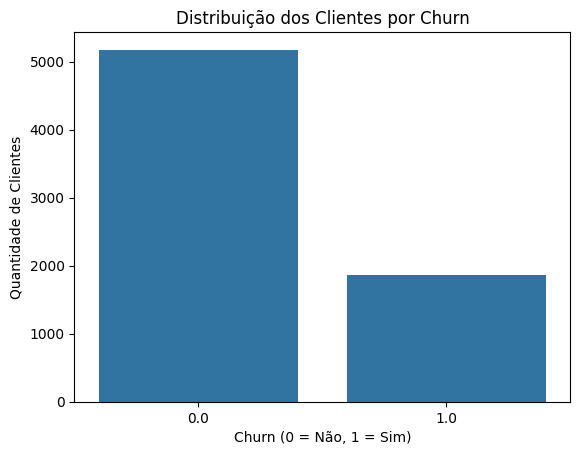

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title('Distribuição dos Clientes por Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Clientes')
plt.show()


In [35]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


In [50]:
df['Churn'].value_counts(dropna=False)


,count
Churn,
0.0,5174
1.0,1869
NaN,224


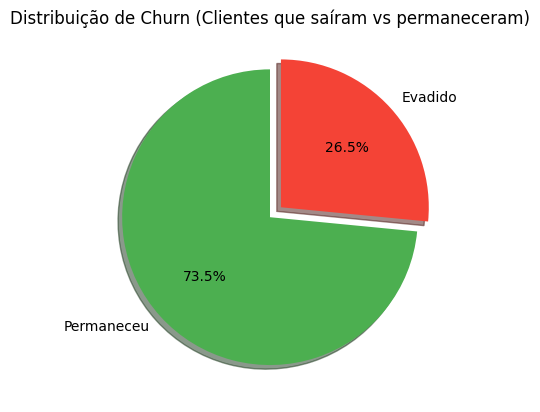

In [37]:
# Contagem dos valores
contagem = df['Churn'].value_counts().sort_index()

# Gráfico de pizza
contagem.plot.pie(
    autopct='%1.1f%%',
    labels=['Permaneceu', 'Evadido'],  # 0 e 1
    colors=['#4CAF50', '#F44336'],
    explode=(0, 0.1),
    startangle=90,
    shadow=True
)

plt.title('Distribuição de Churn (Clientes que saíram vs permaneceram)')
plt.ylabel('')  # Remove o rótulo 'Churn' do centro
plt.show()


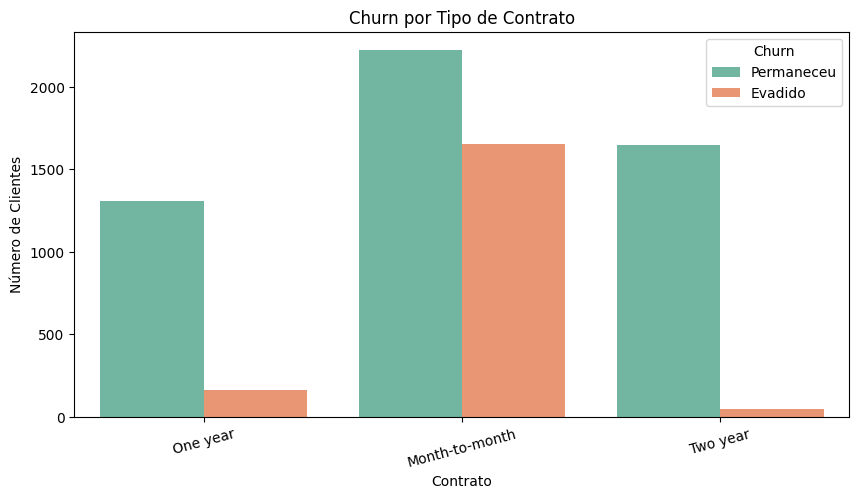

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Contrato', hue='Churn', palette='Set2')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Evadido'])
plt.xticks(rotation=15)
plt.show()

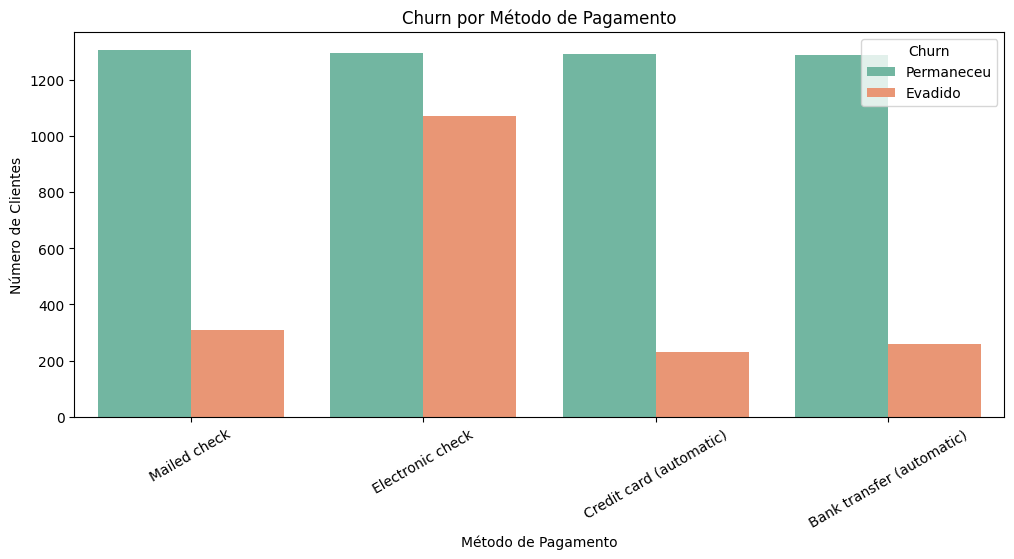

In [39]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Metodo_Pagamento', hue='Churn', palette='Set2')
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Evadido'])
plt.xticks(rotation=30)
plt.show()

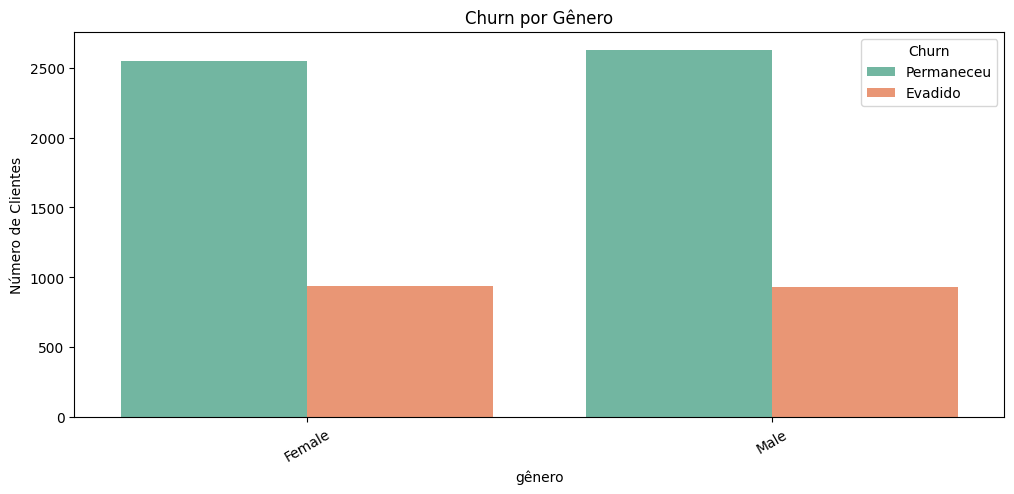

In [40]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='gender', hue='Churn', palette='Set2')
plt.title('Churn por Gênero')
plt.xlabel('gênero')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Permaneceu', 'Evadido'])
plt.xticks(rotation=30)
plt.show()

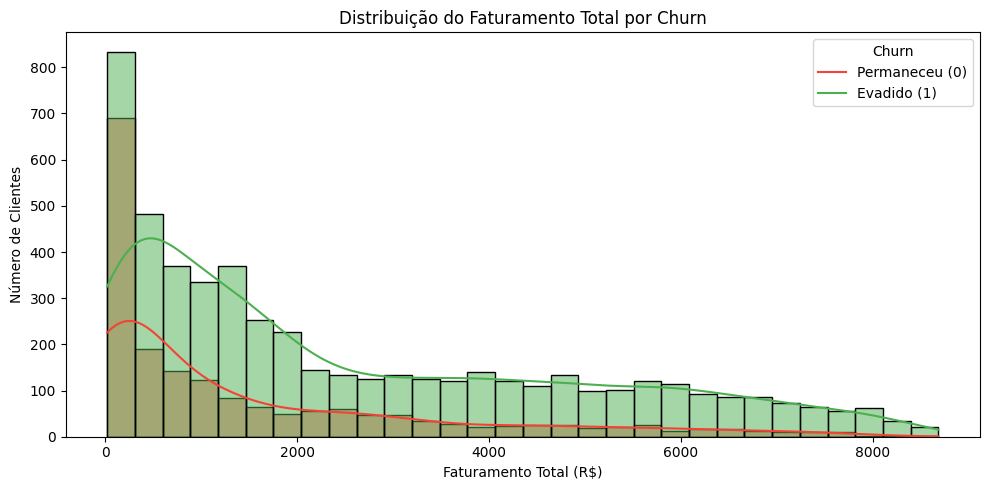

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Faturamento_Total', hue='Churn', kde=True, bins=30, palette={0: '#4CAF50', 1: '#F44336'})
plt.title('Distribuição do Faturamento Total por Churn')
plt.xlabel('Faturamento Total (R$)')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Permaneceu (0)', 'Evadido (1)'])
plt.tight_layout()
plt.show()

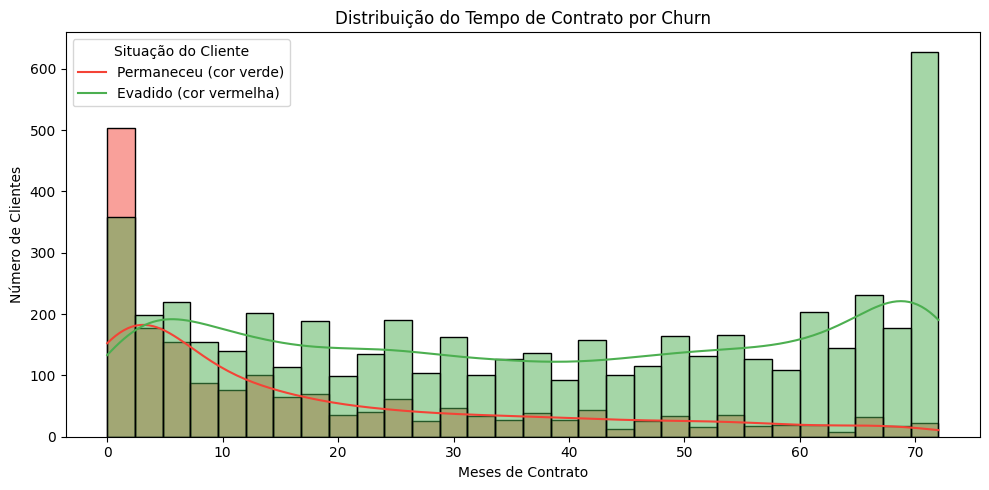

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df,
    x='Tempo_Contrato',
    hue='Churn',
    kde=True,
    bins=30,
    palette={0: '#4CAF50', 1: '#F44336'}
)
plt.title('Distribuição do Tempo de Contrato por Churn')
plt.xlabel('Meses de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(
    title='Situação do Cliente',
    labels=['Permaneceu (cor verde)', 'Evadido (cor vermelha)']
)
plt.tight_layout()
plt.show()


**Relatório Final**

 
📘 RELATÓRIO FINAL - ANÁLISE DE EVASÃO DE CLIENTES (CHURN) NA TELECOM X

✅ OBJETIVO
      O objetivo deste projeto é analisar os dados da empresa Telecom X com o intuito de entender os principais fatores que levam à evasão de clientes (Churn).
      A evasão representa um desafio relevante para empresas de telecomunicação, impactando diretamente na receita.
      Empresas de telecom operam em um mercado altamente competitivo, com margens relativamente pequenas e custos altos para adquirir novos clientes. 

   ⚠️ Quando um cliente sai, a empresa perde:
      * Receita recorrente (mensal)
      * Investimento feito na aquisição daquele cliente
      * Potencial de vendas futuras (cross-sell e upsell)


✅ ETAPAS
      As seguintes etapas de tratamento foram realizadas:
      - Extração de dados
      - Conferência dpo tipo de dados
      - Análise do conteúdo de cada coluna
      - Verificaçãp de inconsistência
      - Tratamento de inconsistências
      - Remoção de duplicatas e nulos
 

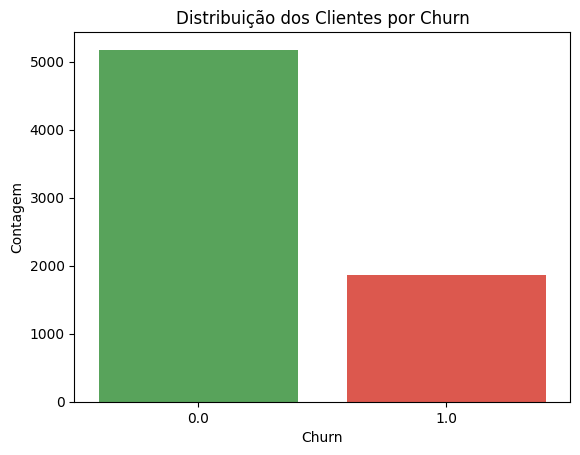

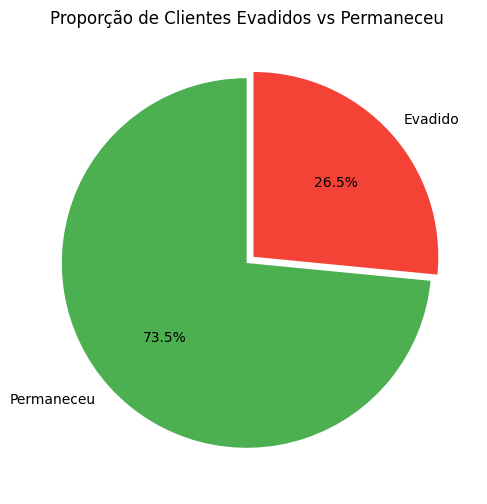

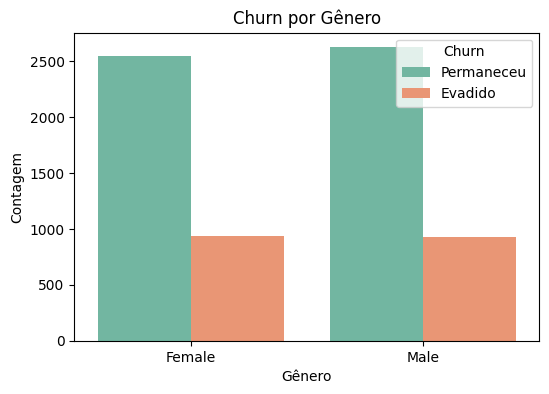

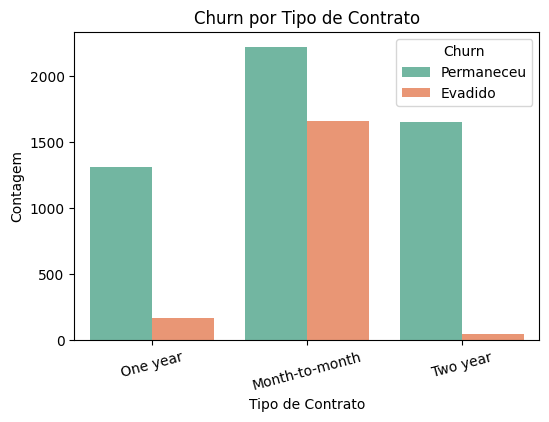

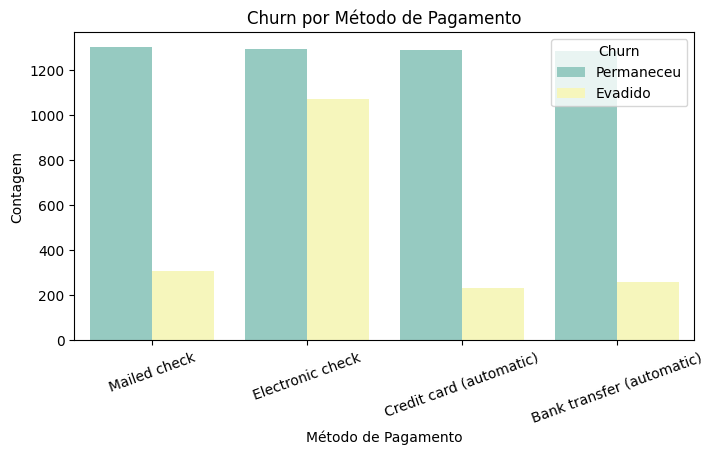

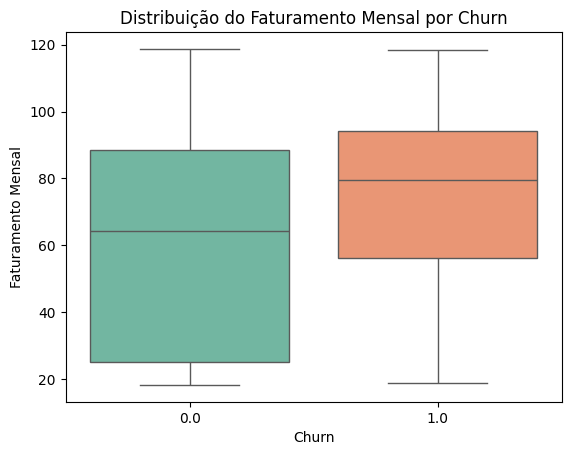



✅ Conclusão, Insights e Recomendações
    
    📌 Clientes que optam por faturamento eletrônico (Paperless Billing) tendem a evadir com mais 
      frequência do que aqueles que recebem faturas físicas.
      
      - Possíveis causas:
        Menor vínculo emocional: o cliente não vê fisicamente a cobrança, o que pode reduzir a percepção de compromisso com a empresa.
        Automatização sem envolvimento: muitos clientes configuram débito automático e, ao menor sinal de insatisfação, cancelam sem muito esforço.
        Menor contato com a marca: a ausência de uma fatura física pode diminuir a exposição à marca, reduzindo o "lembrete" da relação.

      - O que a empresa pode fazer:
        Incluir mensagens personalizadas ou promoções nas faturas eletrônicas.
        Investir em campanhas de engajamento específicas para usuários de faturamento eletrônico.

    📌 A maioria dos evadidos possuem menor tempo de contrato (<12 meses)

      - Possíveis causas
        Expectativas não aten

In [47]:
print("""
📘 RELATÓRIO FINAL - ANÁLISE DE EVASÃO DE CLIENTES (CHURN) NA TELECOM X

✅ OBJETIVO
      O objetivo deste projeto é analisar os dados da empresa Telecom X com o intuito de entender os principais fatores que levam à evasão de clientes (Churn).
      A evasão representa um desafio relevante para empresas de telecomunicação, impactando diretamente na receita.
      Empresas de telecom operam em um mercado altamente competitivo, com margens relativamente pequenas e custos altos para adquirir novos clientes.

   ⚠️ Quando um cliente sai, a empresa perde:
      * Receita recorrente (mensal)
      * Investimento feito na aquisição daquele cliente
      * Potencial de vendas futuras (cross-sell e upsell)
""")

# ---
print("""
✅ ETAPAS
      As seguintes etapas de tratamento foram realizadas:
      - Extração de dados
      - Conferência dpo tipo de dados
      - Análise do conteúdo de cada coluna
      - Verificaçãp de inconsistência
      - Tratamento de inconsistências
      - Remoção de duplicatas e nulos
      - Verificação dos tipos de dados se era o esperado
      - Expansão das colunas que estavam como dicionários
      - Conversão de 'Churn' para binário
      - Renomeação de colunas
      - Criação de coluna GaturamentoDiáro
      - Gráficos para análise descritiva
      - Gráficos para distribuição da evasão
      - Gráfios para a contagem de evasão por variáveis categóricas
      - Gráficos para a distribuição do faturamento total por churn
      - Gráficos para a distribuição do tempo de contrato por churn


✅ ANÁLISES

""")

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn', hue='Churn', palette=['#4CAF50', '#F44336'], legend=False)
plt.title("Distribuição dos Clientes por Churn")
plt.xlabel("Churn")
plt.ylabel("Contagem")
plt.show()


# Gráfico de pizza - proporção
churn_counts = df['Churn'].value_counts()
labels = ['Permaneceu', 'Evadido']
colors = ['#4CAF50', '#F44336']
explode = [0.05 if i==1 else 0 for i in range(len(churn_counts))]

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90)
plt.title('Proporção de Clientes Evadidos vs Permaneceu')
plt.show()

# Churn por Gênero
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='Churn', palette='Set2')
plt.title('Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Permaneceu', 'Evadido'])
plt.show()

# Churn por Tipo de Contrato
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contrato', hue='Churn', palette='Set2')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Permaneceu', 'Evadido'])
plt.xticks(rotation=15)
plt.show()

# Churn por Método de Pagamento
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Metodo_Pagamento', hue='Churn', palette='Set3')
plt.title('Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Permaneceu', 'Evadido'])
plt.xticks(rotation=20)
plt.show()

# Boxplot - Faturamento Mensal
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Churn', y='Faturamento_Mensal', hue='Churn', palette='Set2', legend=False)
plt.title("Distribuição do Faturamento Mensal por Churn")
plt.xlabel("Churn")
plt.ylabel("Faturamento Mensal")
plt.show()



print("""

✅ Conclusão, Insights e Recomendações

    📌 Clientes que optam por faturamento eletrônico (Paperless Billing) tendem a evadir com mais
      frequência do que aqueles que recebem faturas físicas.

      - Possíveis causas:
        Menor vínculo emocional: o cliente não vê fisicamente a cobrança, o que pode reduzir a percepção de compromisso com a empresa.
        Automatização sem envolvimento: muitos clientes configuram débito automático e, ao menor sinal de insatisfação, cancelam sem muito esforço.
        Menor contato com a marca: a ausência de uma fatura física pode diminuir a exposição à marca, reduzindo o "lembrete" da relação.

      - O que a empresa pode fazer:
        Incluir mensagens personalizadas ou promoções nas faturas eletrônicas.
        Investir em campanhas de engajamento específicas para usuários de faturamento eletrônico.

    📌 A maioria dos evadidos possuem menor tempo de contrato (<12 meses)

      - Possíveis causas
        Expectativas não atendidas logo no início
        Clientes pouco engajados
        Promoções iniciais como iscas, após a promoção o cliente abandona
        Concorrência agressiva
        Falta de onboarding e suporte inicial

      - O que a empresa pode fazer
        Foco nos primeiros 90 dias
        Comunicação clara e realista na venda
        Oferecer incentivos para a permanência


    📌 Faturamento mensal mais alto pode indicar risco maior de evasão

      - Clientes de alto valor têm expectativas maiores
        Alvos preferenciais da concorrência
        Planos mais caros, mas com serviços pouco usados
        Contratos empresariais ou familiares com múltiplas linhas

      - O que a empresa pode fazer
         Ofertas personalizadas para retenção
         Monitoramento pro ativo
         Campanhas de reengajamento
         Educação e Onboarding

""")



# **✅ TAREFA EXTRA**

In [51]:
# Ver correlação de todas as colunas numéricas com o churn
correlacoes = df.corr(numeric_only=True)
print(correlacoes['Churn'].sort_values(ascending=False))


Churn                 1.000000
Faturamento_Diario    0.193412
Faturamento_Mensal    0.193356
Idoso                 0.150889
Faturamento_Total    -0.199484
Tempo_Contrato       -0.352229
Name: Churn, dtype: float64


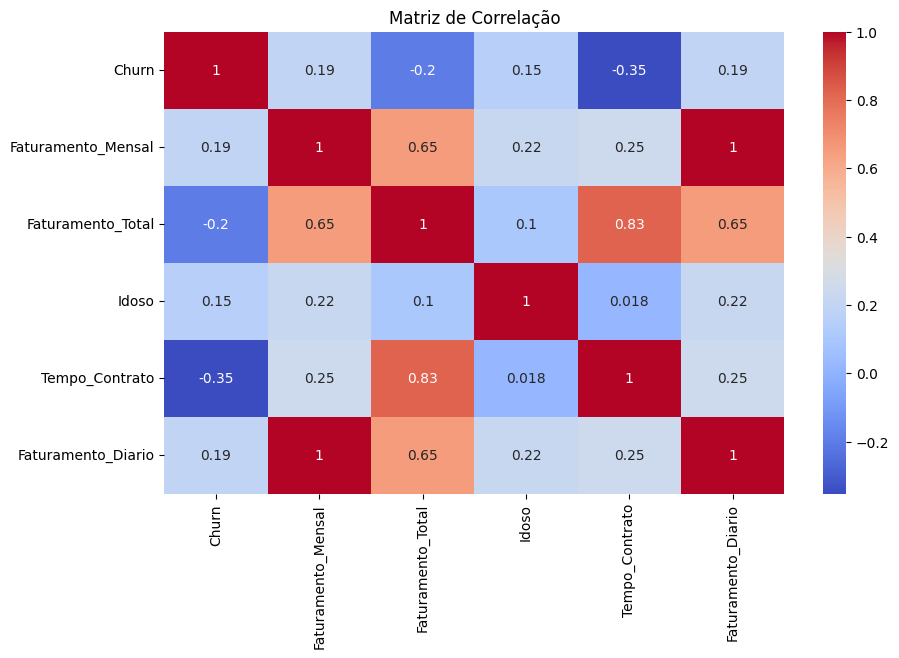

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


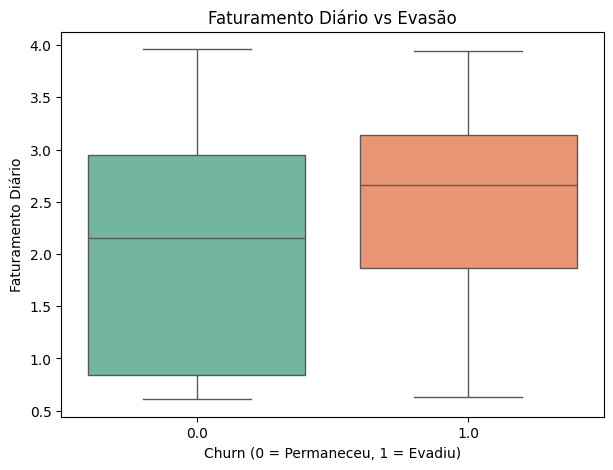

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Churn', y='Faturamento_Diario', hue='Churn', palette='Set2', dodge=False)
plt.title('Faturamento Diário vs Evasão')
plt.xlabel('Churn (0 = Permaneceu, 1 = Evadiu)')
plt.ylabel('Faturamento Diário')
plt.legend([], [], frameon=False)
plt.show()

